In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## 1. Exponentially Weighted Moving Average
$$ \sigma_n^2 = \lambda \sigma_{n-1}^2 + (1 - \lambda)R_n^2 $$
<br /> Where $\sigma$ is the volatility, n is the day, $\lambda$ is the disounting fator ($\lambda \in [0, 1]$), and R is the return of n<sup>th</sup> day. <br />
The above formula, if we remove the induction wil become:
$$\sigma_n^2 = (1 - \lambda) \sum_{i=1}^{\infty} \lambda^{i - 1} R_n^2 \ $$ <br />
Yes, the upper limit is in fact infinity. However, because of the discounting value, the significance becomes lower and lower of things much more in past and hence you can start ignoring them. For the calculations below, I have taken a year worth of data. <br /> <br />
Below is exponential average in using both the iterative and summation approach. 

In [2]:
df = pd.read_csv('../data/ABNB.csv')
returns = df["Adj Close"].pct_change()

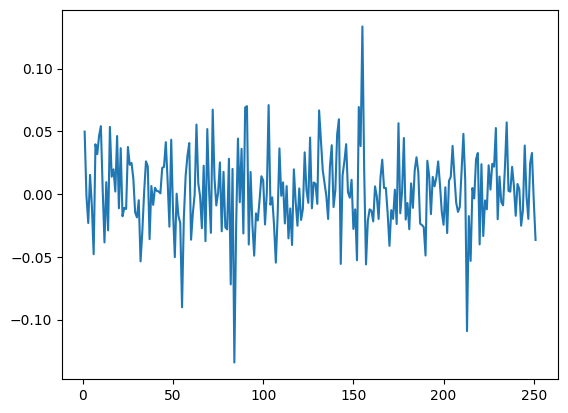

In [3]:
plt.plot(returns)

In [4]:
print(f'max return in a day: {returns.max() * 100}, \n\
min return: {returns.min() * 100}')

max return in a day: 13.353182426908683, 
min return: -13.425033101558014


In [5]:
lamda = 0.9925 # lam"b"da is a reserved keyword

In [6]:
returns_arr = returns.dropna().to_numpy()

### Method 1: Iteration

In [7]:
vol = np.zeros(len(returns_arr))
vol[0] = np.sqrt((1- lamda)) * returns_arr[0]

for i in range(1, len(returns_arr)):
    vol[i] = np.sqrt(lamda * np.power(vol[i - 1], 2) + (1 - lamda) * np.power(returns_arr[i], 2))

vol[-1]

0.02815862599912544

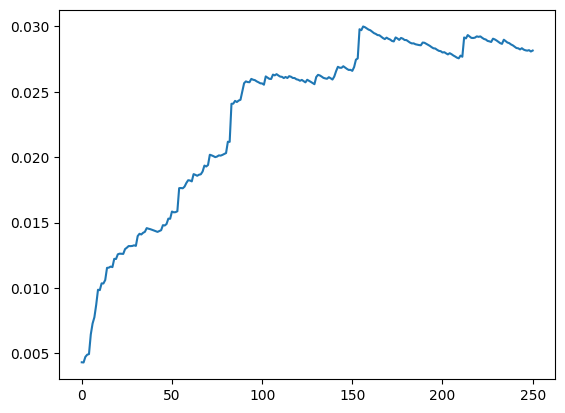

In [8]:
plt.plot(vol)

### Method 2: Summation

In [9]:
lamda = 0.9925
lamdas_arr = np.power(lamda, np.arange(len(df) - 1))[::-1]
r_square = np.power(returns.dropna().to_numpy(), 2)

volatility_today = math.sqrt((1 - lamda) * np.dot(r_square, lamdas_arr))

volatility_today

0.028158625999125456